## Import libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sn
import sklearn
import matplotlib.pyplot as plt
from sklearn.ensemble import AdaBoostClassifier

## Load datasets

In [2]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

In [3]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [4]:
train_data.head(5)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


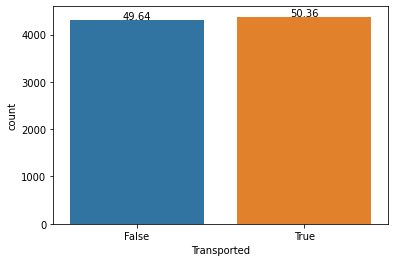

In [5]:
total = float(train_data.shape[0])
ploting = sn.countplot(x='Transported', data=train_data)
for p in ploting.patches:
    height = p.get_height()
    ploting.text(p.get_x() + p.get_width()/2.,
           height +5,
           '{:.2f}'.format((height/total)*100),
           ha='center')
plt.show()

## Data cleaning

In [6]:
billed_cols = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
train_data['total_billed'] = train_data[billed_cols].sum(axis=1)
test_data['total_billed'] = test_data[billed_cols].sum(axis=1)

df_train = train_data.drop(columns=billed_cols, axis=1)
df_test = test_data.drop(columns=billed_cols, axis=1)

df_train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,Name,Transported,total_billed
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,Maham Ofracculy,False,0.0
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,Juanna Vines,True,736.0
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,Altark Susent,False,10383.0
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,Solam Susent,False,5176.0
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,Willy Santantines,True,1091.0


#### Handle Cabin attributes values EX : 'A/0/S'

In [7]:
cabin_train = train_data['Cabin'].astype('category')
train_data['cabin_group'] = cabin_train.apply(lambda x: x.split('/')[0])

# test data
cabin_test = test_data['Cabin'].astype('category')
test_data['cabin_group'] = cabin_test.apply(lambda x: x.split('/')[0])

train_data = train_data.drop(columns='Cabin', axis=1)
test_data = test_data.drop(columns='Cabin', axis=1)

train_data.head()

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,total_billed,cabin_group
0,0001_01,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,0.0,B
1,0002_01,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,736.0,F
2,0003_01,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,10383.0,A
3,0003_02,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,5176.0,A
4,0004_01,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,1091.0,F


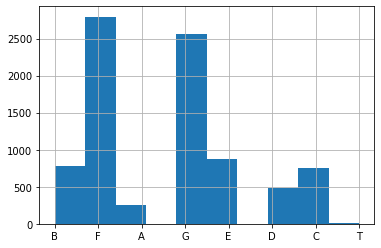

In [8]:
train_data['cabin_group'].hist()

#### Label Encoding

In [9]:
home_planet_map = {'Europa': 1, 'Earth': 2, 'Mars': 3}
train_data['HomePlanet'] = train_data['HomePlanet'].map(home_planet_map)
test_data['HomePlanet'] = test_data['HomePlanet'].map(home_planet_map)

cryoSleep_map = {False: 0, True: 1}
train_data['CryoSleep'] = train_data['CryoSleep'].map(cryoSleep_map)
test_data['CryoSleep'] = test_data['CryoSleep'].map(cryoSleep_map)


destination_map = {'TRAPPIST-1e': 1, 'PSO J318.5-22': 2, '55 Cancri e': 3}
train_data['Destination'] = train_data['Destination'].map(destination_map)
test_data['Destination'] = test_data['Destination'].map(destination_map)

vip_map = {False: 0, True: 1}
train_data['VIP'] = train_data['VIP'].map(vip_map)
test_data['VIP'] = test_data['VIP'].map(vip_map)

cabin_group_map = {'A': 1, 'B': 2, 'C': 3, 'D': 4, 'E': 5, 'F': 6, 'G': 7, 'T': '8'}
train_data['cabin_group'] = train_data['cabin_group'].map(cabin_group_map)
test_data['cabin_group'] = test_data['cabin_group'].map(cabin_group_map)

transported_map = {False: 0, True: 1}
train_data['Transported'] = train_data['Transported'].map(transported_map)

train_data.head()
train_data.columns

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Destination', 'Age', 'VIP',
       'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Name',
       'Transported', 'total_billed', 'cabin_group'],
      dtype='object')

#### Replace NAN values with median

In [10]:
# train data
train_data['HomePlanet'].fillna(train_data['HomePlanet'].median(), inplace=True)
train_data['CryoSleep'].fillna(train_data['CryoSleep'].median(), inplace=True)
train_data['Destination'].fillna(train_data['Destination'].median(), inplace=True)
train_data['VIP'].fillna(train_data['VIP'].median(), inplace=True)
train_data['cabin_group'].fillna(train_data['cabin_group'].median(), inplace=True)
train_data['Age'].fillna(train_data['Age'].median(), inplace=True)
train_data['total_billed'].fillna(train_data['total_billed'].median(), inplace=True)

# test data
test_data['HomePlanet'].fillna(test_data['HomePlanet'].median(), inplace=True)
test_data['CryoSleep'].fillna(test_data['CryoSleep'].median(), inplace=True)
test_data['Destination'].fillna(test_data['Destination'].median(), inplace=True)
test_data['VIP'].fillna(test_data['VIP'].median(), inplace=True)
test_data['cabin_group'].fillna(test_data['cabin_group'].median(), inplace=True)
test_data['Age'].fillna(test_data['Age'].median(), inplace=True)
test_data['total_billed'].fillna(test_data['total_billed'].median(), inplace=True)

In [11]:
train_data.drop_duplicates()

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,total_billed,cabin_group
0,0001_01,1.0,0.0,1.0,39.0,0.0,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,0,0.0,2
1,0002_01,2.0,0.0,1.0,24.0,0.0,109.0,9.0,25.0,549.0,44.0,Juanna Vines,1,736.0,6
2,0003_01,1.0,0.0,1.0,58.0,1.0,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,0,10383.0,1
3,0003_02,1.0,0.0,1.0,33.0,0.0,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,0,5176.0,1
4,0004_01,2.0,0.0,1.0,16.0,0.0,303.0,70.0,151.0,565.0,2.0,Willy Santantines,1,1091.0,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,1.0,0.0,3.0,41.0,1.0,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,0,8536.0,1
8689,9278_01,2.0,1.0,2.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,0,0.0,7
8690,9279_01,2.0,0.0,1.0,26.0,0.0,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,1,1873.0,7
8691,9280_01,1.0,0.0,3.0,32.0,0.0,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,0,4637.0,5


In [12]:
train_data.fillna(train_data.mean(),inplace=True)
test_data.fillna(test_data.mean(),inplace=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


In [13]:
train_data.isnull().sum()

PassengerId       0
HomePlanet        0
CryoSleep         0
Destination       0
Age               0
VIP               0
RoomService       0
FoodCourt         0
ShoppingMall      0
Spa               0
VRDeck            0
Name            200
Transported       0
total_billed      0
cabin_group       0
dtype: int64

In [14]:
test_data.isnull().sum()

PassengerId      0
HomePlanet       0
CryoSleep        0
Destination      0
Age              0
VIP              0
RoomService      0
FoodCourt        0
ShoppingMall     0
Spa              0
VRDeck           0
Name            94
total_billed     0
cabin_group      0
dtype: int64

## Play with the Model

In [15]:
train_data = train_data.drop(columns=['Name', 'PassengerId'], axis=1)

test_ids = test_data['PassengerId']
test_data = test_data.drop(columns=['Name', 'PassengerId'], axis=1)

y = train_data['Transported']
X = train_data.drop(columns='Transported')

X_train, X_valid, y_train, y_valid = sklearn.model_selection.train_test_split(X,y,
                                                     test_size=0.5,
                                                     random_state=42)

In [16]:
# from sklearn.ensemble import RandomForestClassifier
# model = RandomForestClassifier(n_estimators = 500,criterion='gini',max_features='sqrt') 
from sklearn.svm import SVC
model = SVC(kernel='rbf',degree=9,gamma='scale')

In [17]:
from sklearn.model_selection import cross_val_score , cross_val_predict
accuracy = cross_val_score(model,X_train,y_train,cv=5,scoring='accuracy')

In [18]:
np.mean(accuracy)

0.786931735513141

In [19]:
model.fit(X_train, y_train)
prediction = model.predict(test_data)
prediction.shape

(4277,)

In [20]:
submission = pd.read_csv('sample_submission.csv')
submission

,PassengerId,Transported
0,0013_01,False
1,0018_01,False
2,0019_01,False
3,0021_01,False
4,0023_01,False
...,...,...
4272,9266_02,False
4273,9269_01,False
4274,9271_01,False
4275,9273_01,False


In [21]:
submission['Transported'] = prediction
submission['Transported'] = submission['Transported'].map({0:False,1:True})
submission

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,True
...,...,...
4272,9266_02,True
4273,9269_01,False
4274,9271_01,True
4275,9273_01,True


In [22]:
submission.to_csv('submission.csv',index=False)